In [144]:
from datetime import datetime

import pandas as pd

from vortexasdk import CargoMovements, Geographies, Products

In [145]:
singapore = [g.id for g in Geographies().search(term="singapore").to_list() if "port" in g.layer]

2020-01-21 08:37:23,295 vortexasdk.operations — INFO — Searching Geographies with params: {'term': ['singapore']}
2020-01-21 08:37:23,414 vortexasdk.client — INFO — 24 Results to retreive. Sending 1 post requests in parallel using 6 threads.


In [146]:
fuel_oil = [p.id for p in Products().search(term="fuel oil").to_list()]

2020-01-21 08:37:24,251 vortexasdk.operations — INFO — Searching Products with params: {'term': ['fuel oil'], 'ids': [], 'product_parent': [], 'allowTopLevelProducts': True}
2020-01-21 08:37:24,364 vortexasdk.client — INFO — 1 Results to retreive. Sending 1 post requests in parallel using 6 threads.


In [147]:
df = CargoMovements()\
        .search(filter_activity="unloading_state",
            filter_destinations=singapore,
            filter_products=fuel_oil,
            filter_time_min=datetime(2019, 1, 1),
            filter_time_max=datetime(2019, 12, 31))\
        .to_df()

2020-01-21 08:37:24,697 vortexasdk.operations — INFO — Searching CargoMovements with params: {'filter_activity': 'unloading_state', 'filter_time_min': '2019-01-01T00:00:00.000Z', 'filter_time_max': '2019-12-31T00:00:00.000Z', 'cm_unit': 'b', 'size': 500, 'filter_charterers': [], 'filter_owners': [], 'filter_products': ['1c107b4317bc2c85fb6c13cd7b28e8e0a02ec7fecc68afc2b68ca0545c835e1c'], 'filter_vessels': [], 'filter_destinations': ['1b79e18416d358d7e07b978abcab3f17e2ca75085a6d70ce1811cf4eaeaea886'], 'filter_origins': [], 'filter_storage_locations': [], 'filter_ship_to_ship_locations': [], 'filter_waypoints': [], 'disable_geographic_exclusion_rules': None}



Loading from API:   0%|          | 0/1574 [00:00<?, ?it/s]

2020-01-21 08:37:26,202 vortexasdk.client — INFO — 1574 Results to retreive. Sending 4 post requests in parallel using 6 threads.


Loading from API: 2000it [00:02, 878.83it/s]              


In [148]:
timestamp_col = "events.cargo_port_unload_event.0.start_timestamp"
df["month"] = pd.to_datetime(df[timestamp_col]).dt.month

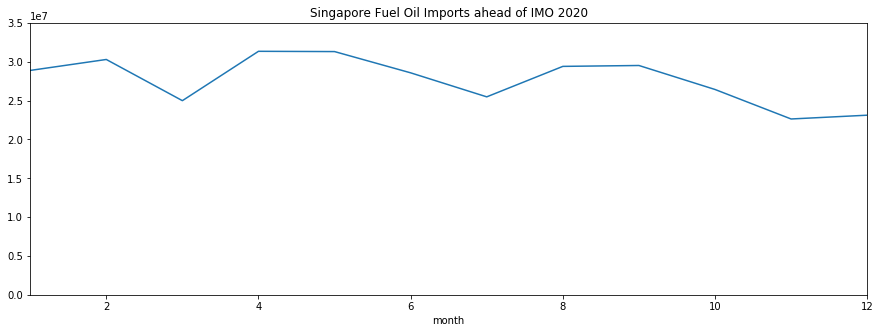

In [149]:
monthly_aggregate = df.groupby(by="month")["quantity"].sum()

monthly_aggregate.plot(title="Singapore Fuel Oil Imports ahead of IMO 2020", ylim=(0, 3.5e7), figsize=(15, 5))